In [1]:
pip install --user tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
print(tf.__version__)

2.2.0


In [6]:
df=keras.datasets.fashion_mnist

In [7]:
(train_images, train_labels), (test_images, test_labels) = df.load_data()

In [8]:
class_names= ['T-shirt','Trouser','Pullover','Dress','Coat','Footwear','Shirt','Sneaker','Bag','Ankle-boot']

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_images)

60000

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
test_images.shape

(10000, 28, 28)

<function matplotlib.pyplot.show(*args, **kw)>

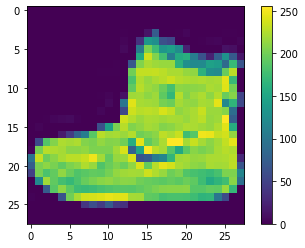

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

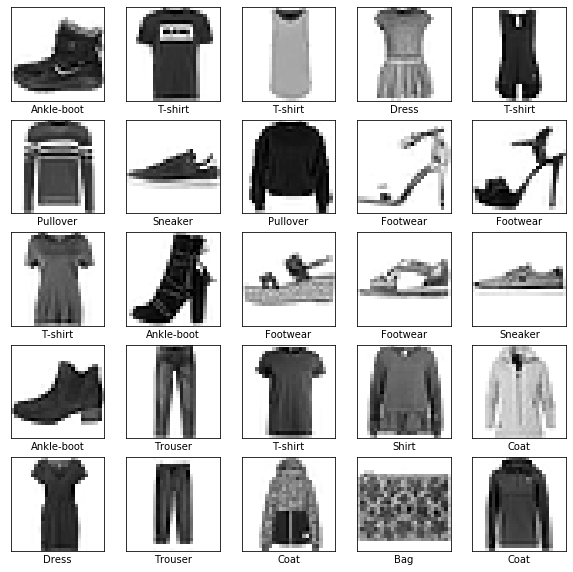

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [16]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [17]:
pip install --user keras

Note: you may need to restart the kernel to use updated packages.


In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
from keras.models import load_model

In [20]:
from tensorflow.keras.losses import *

In [21]:
model.fit(train_images, train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4959 - accuracy: 0.8270
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3759 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3334 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3092 - accuracy: 0.8865
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2932 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2805 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2651 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2561 - accuracy: 0.9054
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2455 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2

In [22]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print('Test accuracy',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3397 - accuracy: 0.8788
Test accuracy 0.8787999749183655


In [23]:
prediction = model.predict(test_images)

In [24]:
prediction[0]

array([2.5447346e-06, 2.6050236e-12, 3.4592020e-08, 6.3719233e-14,
       5.1883923e-08, 1.0105242e-02, 8.4101828e-07, 2.7906371e-02,
       4.2444913e-08, 9.6198487e-01], dtype=float32)

In [25]:
np.argmax(prediction[0])

9

In [26]:
test_labels[0]

9

In [44]:
def plot_images(i, prediction_array, true_label, img):
    prediction_array, true_label, img= prediction_array[i] , true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    prediction_label = np.argmax(prediction_array)
    if prediction_label==true_label:
        color='blue'
    else:
        color='red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[prediction_label],
                                        100*np.max(prediction_array),
                                        class_names[true_label]),
                                        color=color)
    
    
def plot_value_array(i, prediction_array, true_label):
    prediction_array, true_label= prediction_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10), prediction_array, color='#777777')
    plt.ylim([0,1])
    prediction_label= np.argmax(prediction_array)
        
    thisplot[prediction_label].set_color('red')
    thisplot[true_label].set_color('green')
        

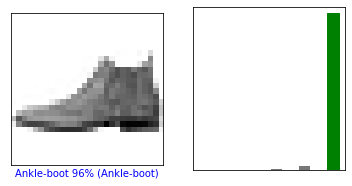

In [45]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i,prediction,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,prediction,test_labels)
plt.show()

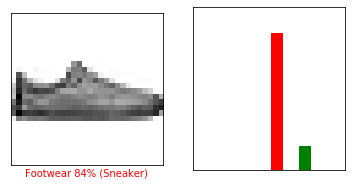

In [46]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i,prediction,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,prediction,test_labels)
plt.show()

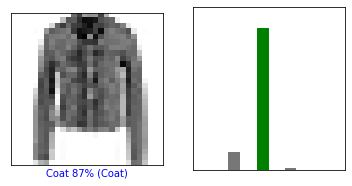

In [47]:
i=10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i,prediction,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,prediction,test_labels)
plt.show()

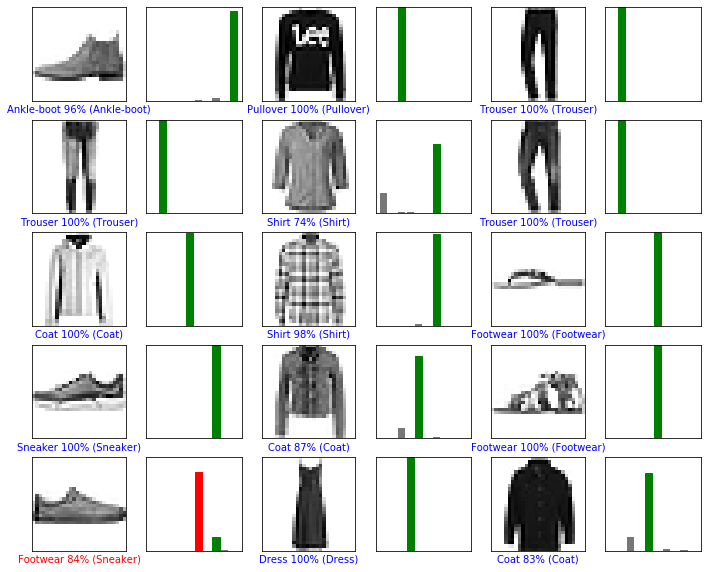

In [50]:
num_rows= 5 
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_images(i, prediction, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, prediction, test_labels)
plt.show()

In [51]:
img = test_images[0]
print(img.shape)

(28, 28)


In [53]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [54]:
prediction_single=model.predict(img)
print(prediction_single)

[[2.5447346e-06 2.6050236e-12 3.4592020e-08 6.3719354e-14 5.1884022e-08
  1.0105232e-02 8.4101674e-07 2.7906338e-02 4.2444750e-08 9.6198487e-01]]


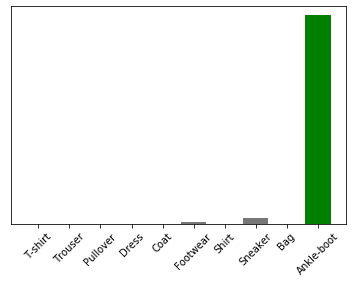

In [55]:
plot_value_array(0, prediction_single, test_labels)
_= plt.xticks(range(10),class_names,rotation=45)